In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from POT import POT

In [2]:
def split_pos_neg(p):
    p_pos_full = np.zeros_like(p)#, dtype=np.float16)
    p_neg_full = np.zeros_like(p)#, dtype=np.float16)

    p_pos_indices = np.where(p > 0)[0]
    p_neg_indices = np.where(p < 0)[0]

    p_pos_full[p_pos_indices] = p[p_pos_indices]
    p_neg_full[p_neg_indices] = p[p_neg_indices]

    p_neg_full = np.abs(p_neg_full)

    return p_pos_full, p_neg_full

In [3]:
# Load pressure and DOA data for locations 2 and 4
pressure_files = ['/Users/valeriolorenzoni/Documents/maria/helixon/SRIR40k/ground_1_0_p.csv', '/Users/valeriolorenzoni/Documents/maria/helixon/SRIR40k/ground_5_0_p.csv']
doa_files = ['/Users/valeriolorenzoni/Documents/maria/helixon/SRIR40k/ground_1_0_doa.csv', '/Users/valeriolorenzoni/Documents/maria/helixon/SRIR40k/ground_5_0_doa.csv']

p_w_pos = []
p_w_neg = []
doa_data = []

for i in range(len(pressure_files)):
    df_pressure = pd.read_csv(pressure_files[i], header=None).values.flatten()#.astype(np.float16)
    df_pressure = df_pressure[400:40000]#.astype(np.float16)
    print("PRESSURE SHAPE: ")
    print(df_pressure.shape)
    print(df_pressure[0] )
    print()


    df_doa = pd.read_csv(doa_files[i], header=None).values#.astype(np.float16)
    df_doa = df_doa[400:40000]#.astype(np.float16)
    print("DOA SHAPE: ")
    print(df_doa.shape)
    print(df_doa[0])
    print()

    combined_df = pd.DataFrame({'pressure': df_pressure, 'doa_x': df_doa[:,0], 'doa_y': df_doa[:,1], 'doa_z': df_doa[:,2]})

    # Drop rows with any NaN values and get corresponding indices
    combined_df = combined_df.dropna()

    # Separate pressure data back
    df_pressure = combined_df['pressure'].values
    df_doa = combined_df[['doa_x', 'doa_y', 'doa_z']].values



    # Splitting positive and negative pressure
    p_pos, p_neg = split_pos_neg(df_pressure)
    p_w_pos.append(p_pos)
    p_w_neg.append(p_neg)
    doa_data.append(df_doa)

doa_data[0] = doa_data[0][0:30000]
doa_data[1] = doa_data[1][0:30000]
p_w_pos[0] = p_w_pos[0][0:30000]
p_w_pos[1] = p_w_pos[1][0:30000]
p_w_neg[0] = p_w_neg[0][0:30000]
p_w_neg[1] = p_w_neg[1][0:30000]




PRESSURE SHAPE: 
(39600,)
0.0314622997415602

DOA SHAPE: 
(39600, 3)
[-0.30038384 -0.90115151  2.70345452]

PRESSURE SHAPE: 
(39600,)
-0.0164291138301105

DOA SHAPE: 
(39600, 3)
[ 2.29442997e-16 -1.28148124e+00 -2.56296248e+00]



In [4]:
# Create point clouds for positive and negative pressures
PC2_pos = {'pos': doa_data[0].reshape(-1,3), 'mass': p_w_pos[0], 'n': len(doa_data[0])}
PC4_pos = {'pos': doa_data[1].reshape(-1,3), 'mass': p_w_pos[1], 'n': len(doa_data[1])}

PC2_neg = {'pos': doa_data[0].reshape(-1,3), 'mass': p_w_neg[0], 'n': len(doa_data[0])}
PC4_neg = {'pos': doa_data[1].reshape(-1,3), 'mass': p_w_neg[1], 'n': len(doa_data[1])}


print("CHECK IF DIMENSIONS ARE RIGHT: ")
print(PC2_neg['pos'].shape)
print(PC2_pos['mass'].shape)
print(PC2_pos['n'])
print()

CHECK IF DIMENSIONS ARE RIGHT: 
(30000, 3)
(30000,)
30000



In [5]:
# Set expected distance and tolerance
distEx = np.nanmean(np.abs(PC4_pos['pos'] - PC2_pos['pos']))#.astype(np.float16)  # IDK WHAT TO PUT SO I DID THIS
distTol = 0.2 #np.float16(0.2)
print("DIST EX: ")
print(distEx)
print()


DIST EX: 
73.8149854795818



In [6]:
pot_pos = POT(PC2_pos, PC4_pos, distEx, distTol)
print("REAACHEEEDDDDDDDDDDDDD end of pot pos")
print(np.mat(pot_pos.T).shape)

COST MATRIX SHAPE: 
(30000, 30000)
DUMMY COST: 217.94608325403487
mass transported: 13838.353977242032 index: 0
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 28128
Cost coarse at index 0
mass transported: 13979.561670887359 index: 1
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 28661
Cost coarse at index 1
mass transported: 14120.769364532685 index: 2
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 29310
Cost coarse at index 2
REAACHEEEDDDDDDDDDDDDD end of pot pos
(30000, 30000)


In [7]:
pot_neg = POT(PC2_neg, PC4_neg, distEx, distTol)
print("REAACHEEEDDDDDDDDDDDDD end of pot neg")

COST MATRIX SHAPE: 
(30000, 30000)
DUMMY COST: 217.94608325403487
mass transported: 13837.966129571974 index: 0
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 28218
Cost coarse at index 0
mass transported: 12849.53997745969 index: 1
NumIterMax: 10000000
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 28773
Cost coarse at index 1
mass transported: 12990.743713475731 index: 2
NumIterMax: 10000000
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 29321
Cost coarse at index 2
mass transported: 13131.947449491772 index: 3
NumIterMax: 10000000
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 25572
Cost coarse at index 3
mass transported: 13273.151185507812 index: 4
NumIterMax: 10000000
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 26096
Cost coarse at index 4
mass transported: 13414.354921523853 index: 5
NumIterMax: 10000000
DONE WITH OBTAINING TX ONCE
Number of non-zeros in Tx: 26616
Cost coarse at index 5
mass transported: 13555.558657539894 index: 6
NumI

## END OF POT. INTERPOLATION OF PC BEGINS HERE

In [8]:
##PROLLY BETTER INTERPOLATION
k=0.5
PCk_pos_better = pot_pos.interpolatePC(k)
PCk_neg_better = pot_neg.interpolatePC(k)

## MAKE CSVs
This takes the format 
method_PC-Interpolated_fromwhat-towhat_pressure/doa_pos/neg.csv
e.g. pot_2_1-3_p_pos.csv, pot_2_1-3_doa_pos.csv

In [9]:
pd.DataFrame(PCk_pos_better['pressure']).to_csv('interp_csv/pot_3_1-5_p_pos.csv', header=False, index=False)
pd.DataFrame(PCk_pos_better['doa']).to_csv('interp_csv/pot_3_1-5_doa_pos.csv', header=False, index=False)

pd.DataFrame(PCk_neg_better['pressure']).to_csv('interp_csv/pot_3_1-5_p_neg.csv', header=False, index=False)
pd.DataFrame(PCk_neg_better['doa']).to_csv('interp_csv/pot_3_1-5_doa_neg.csv', header=False, index=False)

In [15]:
### combine pc
PCk_neg_better['pressure'] = np.negative(PCk_neg_better['pressure'])
all_pressures = np.concatenate((PCk_pos_better['pressure'], PCk_neg_better['pressure']))
all_doas = np.concatenate((PCk_pos_better['doa'], PCk_neg_better['doa']))

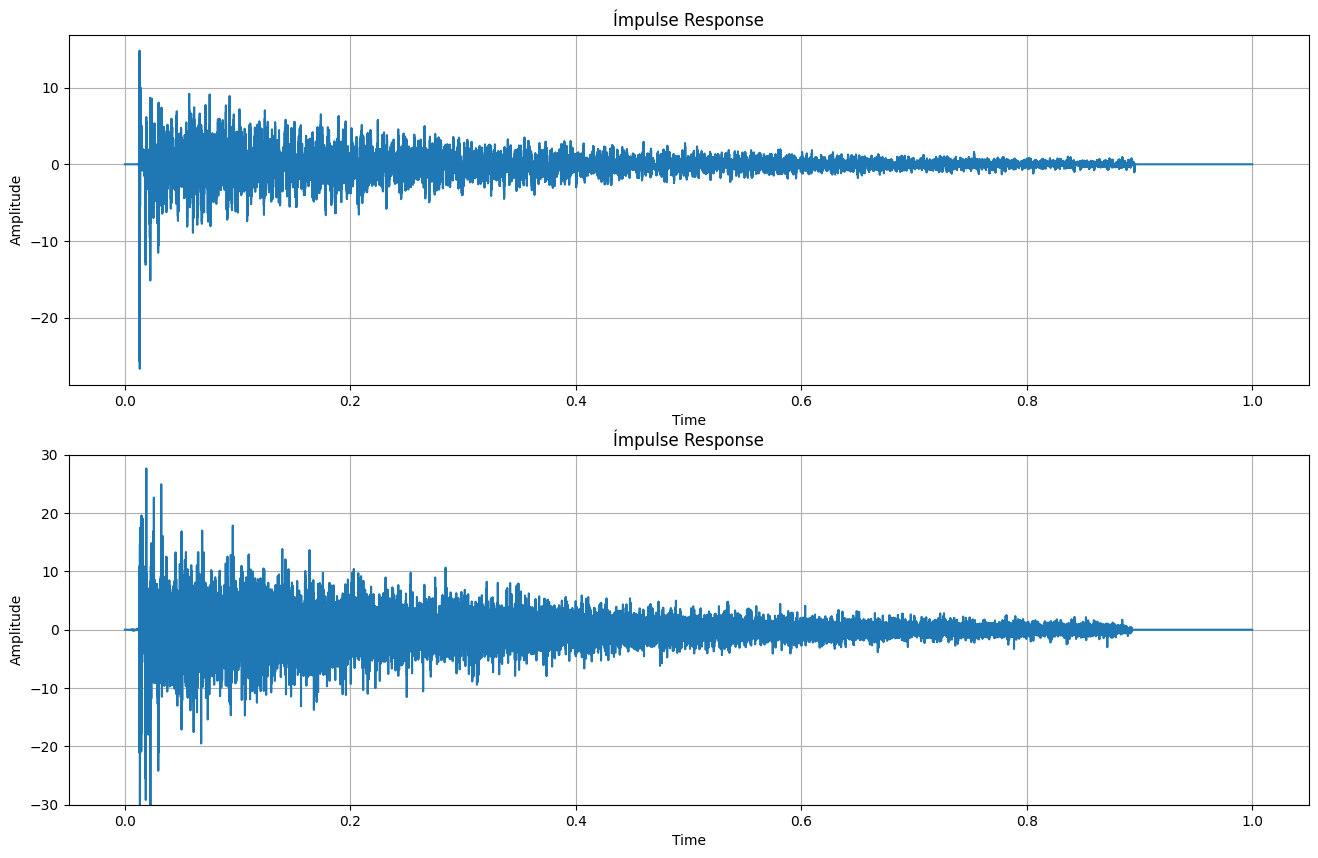

In [24]:
### RIR
c=243
timeshifts = np.linalg.norm(all_doas, axis=1)/c

time = np.linspace(0,1,100000)
ir = np.zeros_like(time)

for i in range (len(all_pressures)):
    index = np.searchsorted(time, timeshifts[i])
    ir[index]+= all_pressures[i]

gt_pressure = pd.read_csv('/Users/valeriolorenzoni/Documents/maria/helixon/GT/ground_3_0_p.csv', header=None).values.flatten()#.astype(np.float16)
gt_doa = pd.read_csv('/Users/valeriolorenzoni/Documents/maria/helixon/GT/ground_3_0_doa.csv', header=None).values#.astype(np.float16)

timeshifts_gt = np.linalg.norm(gt_doa, axis=1)/c
time_gt = np.linspace(0,1,1000000)
ir_gt = np.zeros_like(time_gt)

for i in range (len(gt_pressure)):
    index_gt = np.searchsorted(time_gt, timeshifts_gt[i])
    ir_gt[index_gt]+= gt_pressure[i]


plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(time_gt, ir_gt)
plt.title('Ímpulse Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(2,1,2)
plt.plot(time, ir)
plt.title('Ímpulse Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim(-30,30)
plt.grid(True)
plt.show()




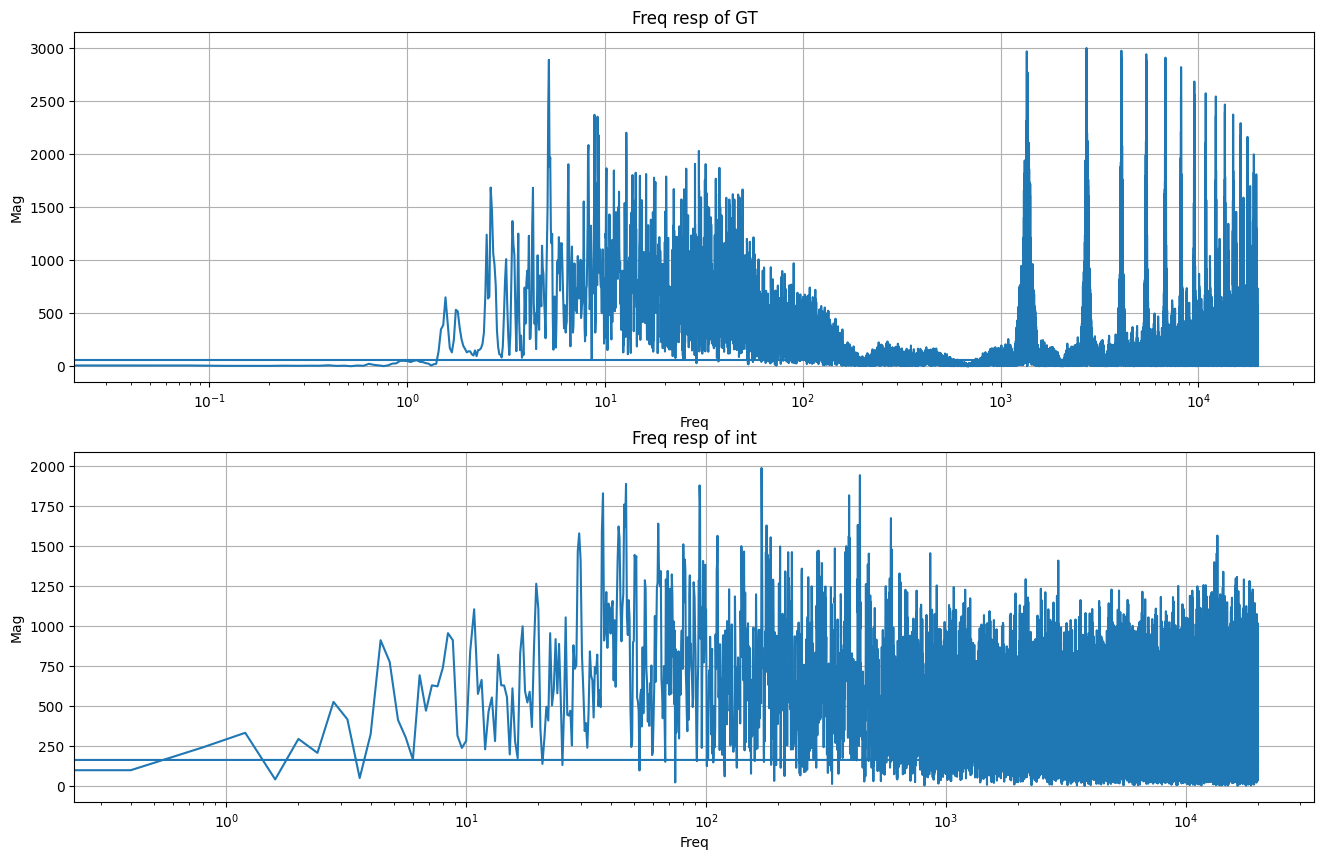

In [27]:
freq_resp_gt = np.fft.fft(ir_gt)
frequencies_gt = np.fft.fftfreq(len(freq_resp_gt),1/40000)

freq_resp = np.fft.fft(ir)
frequencies = np.fft.fftfreq(len(freq_resp),1/40000)

plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(frequencies_gt, np.abs(freq_resp_gt))
plt.title('Freq resp of GT')
plt.xlabel('Freq')
plt.ylabel('Mag')
plt.grid(True)
plt.xscale('log')

plt.subplot(2,1,2)
plt.plot(frequencies, np.abs(freq_resp))
plt.title('Freq resp of int')
plt.xlabel('Freq')
plt.ylabel('Mag')
plt.grid(True)
plt.xscale('log')
plt.show()
